# Problem 1

In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [313]:
df =  pd.read_excel('Election_Data.xlsx',sheet_name=1,index_col=0)

In [314]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


###### The data types are int64 - 7 attributes and object - 2 attributes 

In [316]:
print('No of rows',df.shape[0],'and No of columns ',df.shape[1])

No of rows 1525 and No of columns  9


In [317]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [318]:
df.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1521,Conservative,67,5,3,2,4,11,3,male
1522,Conservative,73,2,2,4,4,8,2,male
1523,Labour,37,3,3,5,4,2,2,male
1524,Conservative,61,3,3,1,4,11,2,male
1525,Conservative,74,2,3,2,4,11,0,female


In [319]:
df.isna().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

#### There are no missing values or nulls

In [320]:
df.duplicated().sum()

8

####  There are 8 duplicate records

In [321]:
df.drop_duplicates(inplace=True)

In [322]:
df.duplicated().sum()

0

In [323]:
df.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

#### except age , the other attributes in essence are categorical data as per the data dictionary , there is slight positive skew in age , as mean is slightly greater than median
#### but roughly , the data is quite normally distributed 

### 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [324]:
num_df = df.select_dtypes('int64').columns

In [325]:
obj_df = df.select_dtypes('object').columns

In [326]:
num_df

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge'],
      dtype='object')

In [327]:
obj_df

Index(['vote', 'gender'], dtype='object')

###### outlier check

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

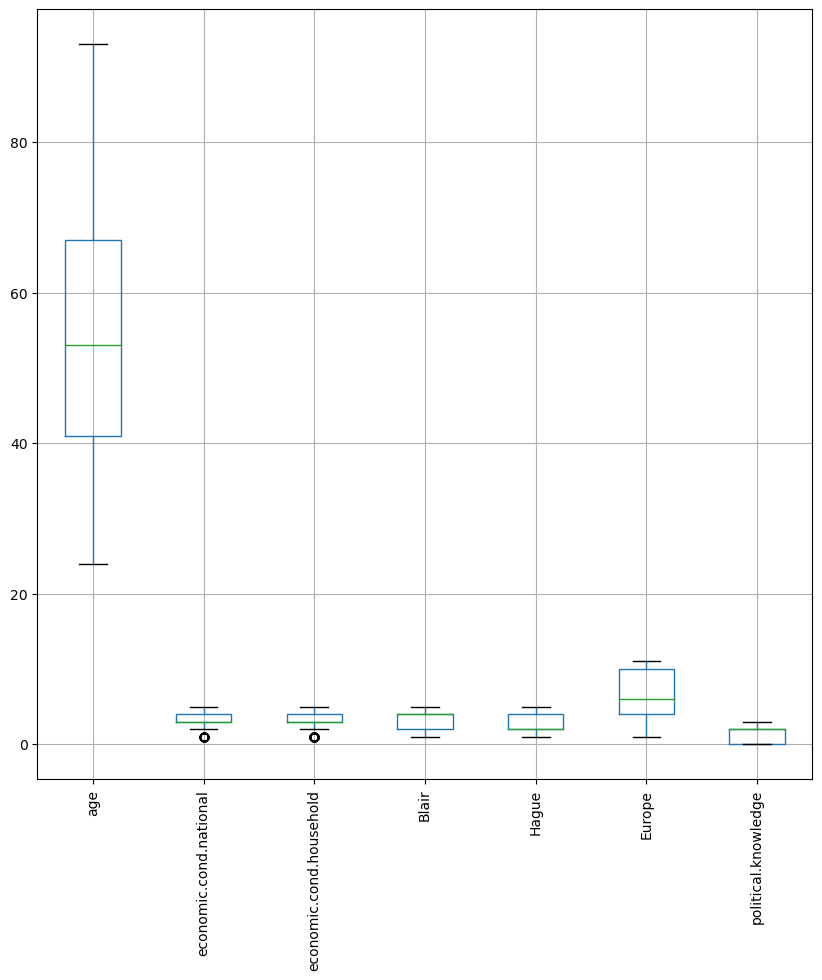

In [328]:
plt.figure(figsize=(10,10))
df[num_df].boxplot()
plt.xticks(rotation=90)
plt.tight_layout

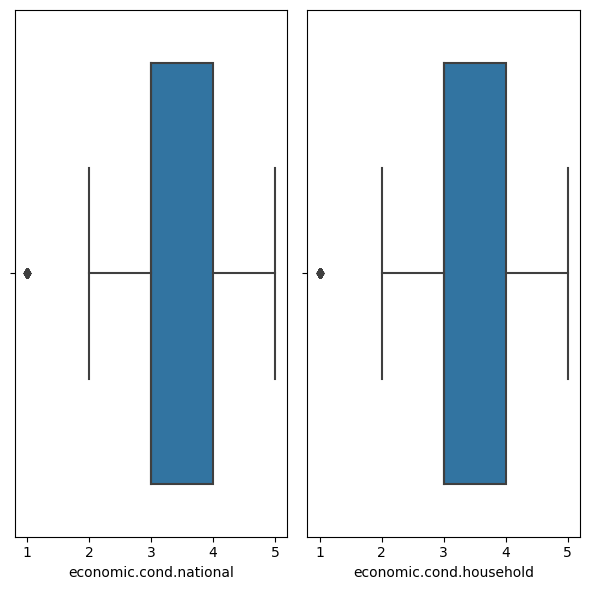

In [329]:
plt.figure(figsize = (6,6))
plt.subplot(1,2,1)
sns.boxplot(df['economic.cond.national'])
plt.subplot(1,2,2)
sns.boxplot(df['economic.cond.household'])
plt.tight_layout()

The outliers represented for economic.cond.national and economic.cond.household are genuine outliers as these are ratings which are 1 to 5 ,hence no outliers in the data set 

###### Univariate Analysis

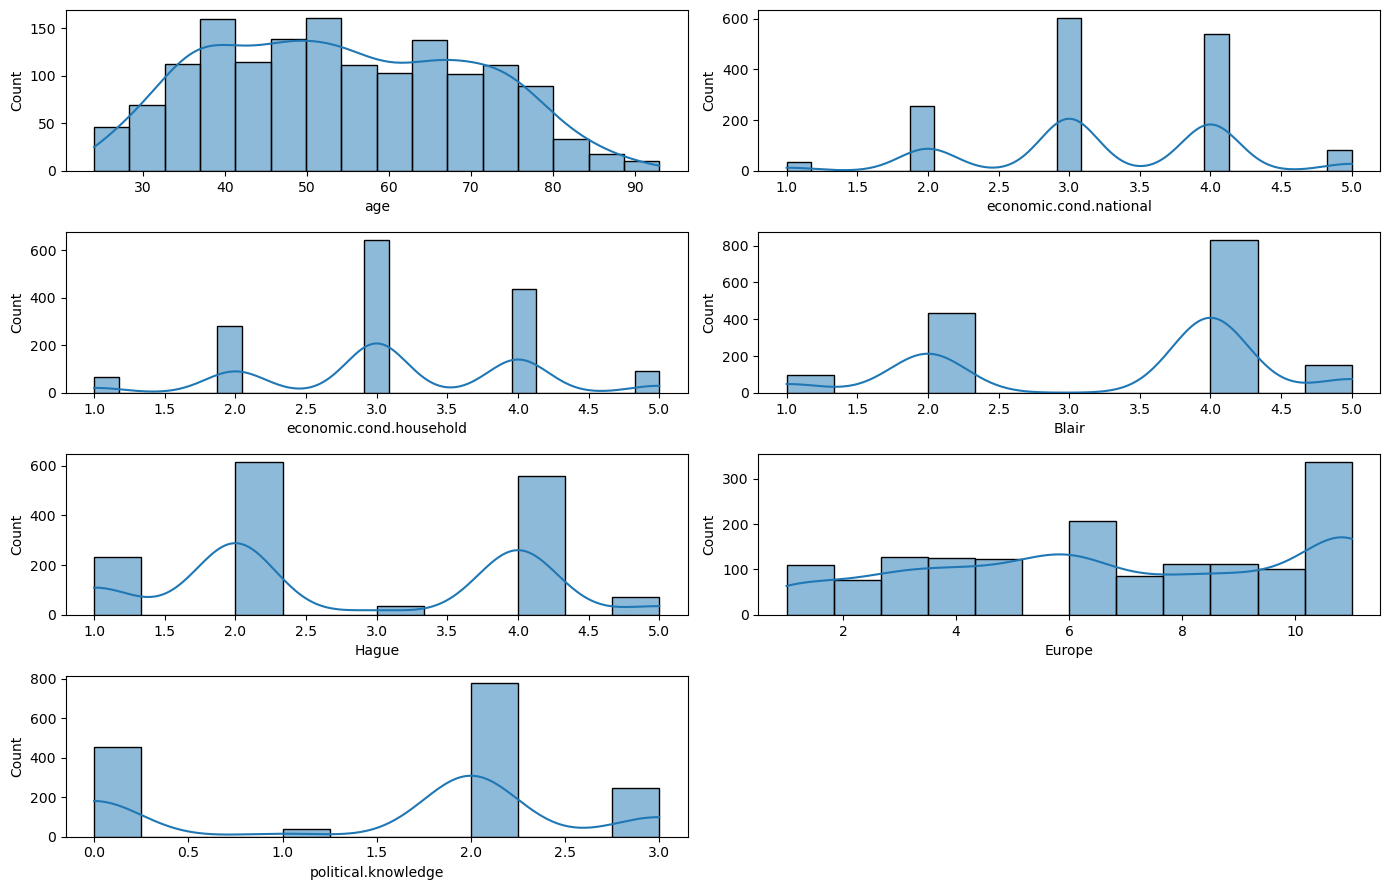

In [330]:
plt.figure(figsize = (14,9))
for i in range(0,len(num_df)):
    plt.subplot(4,2,i+1)
    sns.histplot(df[num_df[i]],kde=True)
plt.tight_layout()

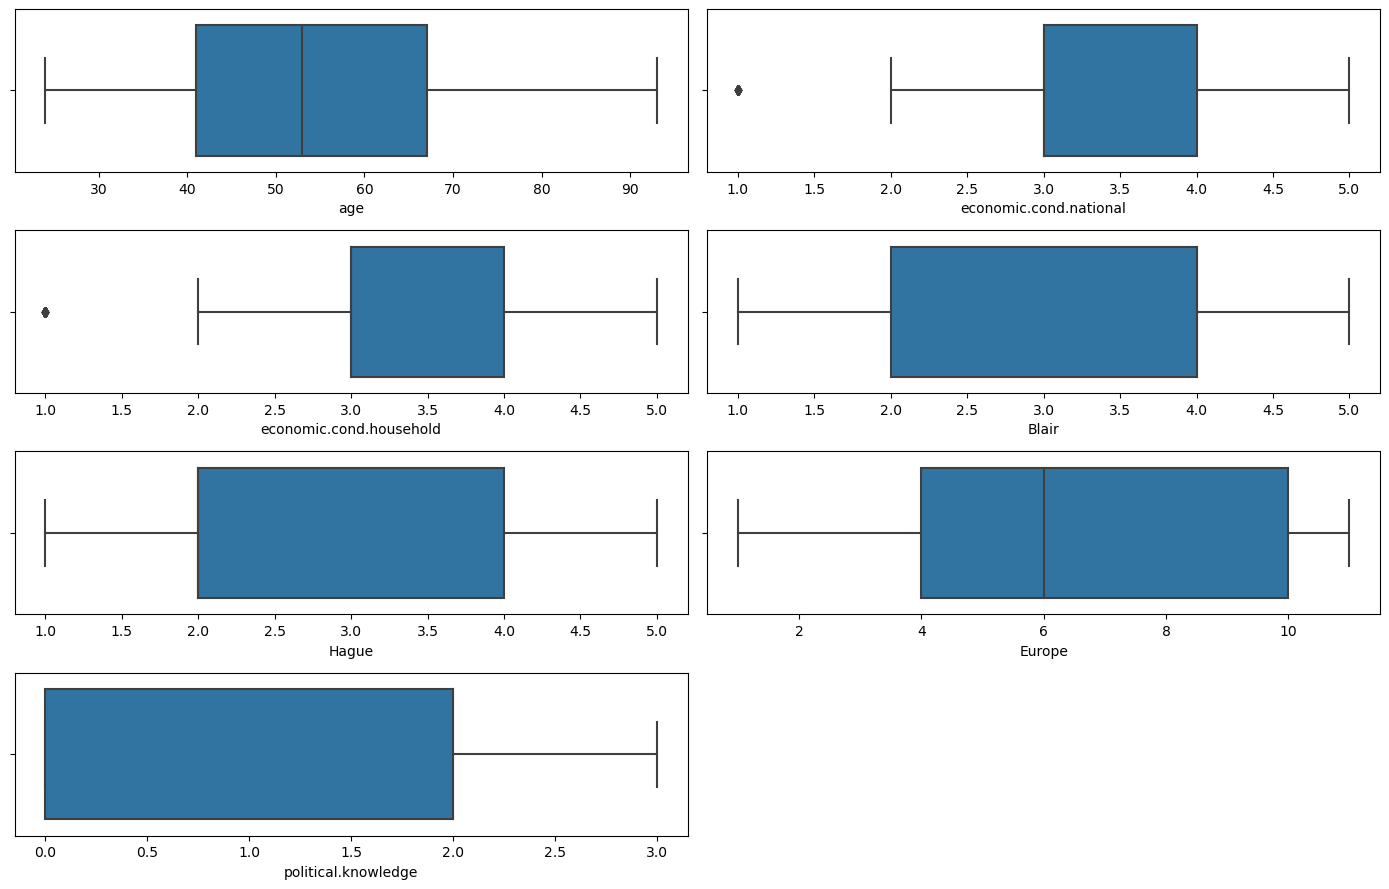

In [331]:
plt.figure(figsize = (14,9))
for i in range(0,len(num_df)):
    plt.subplot(4,2,i+1)
    sns.boxplot(df[num_df[i]])
plt.tight_layout()

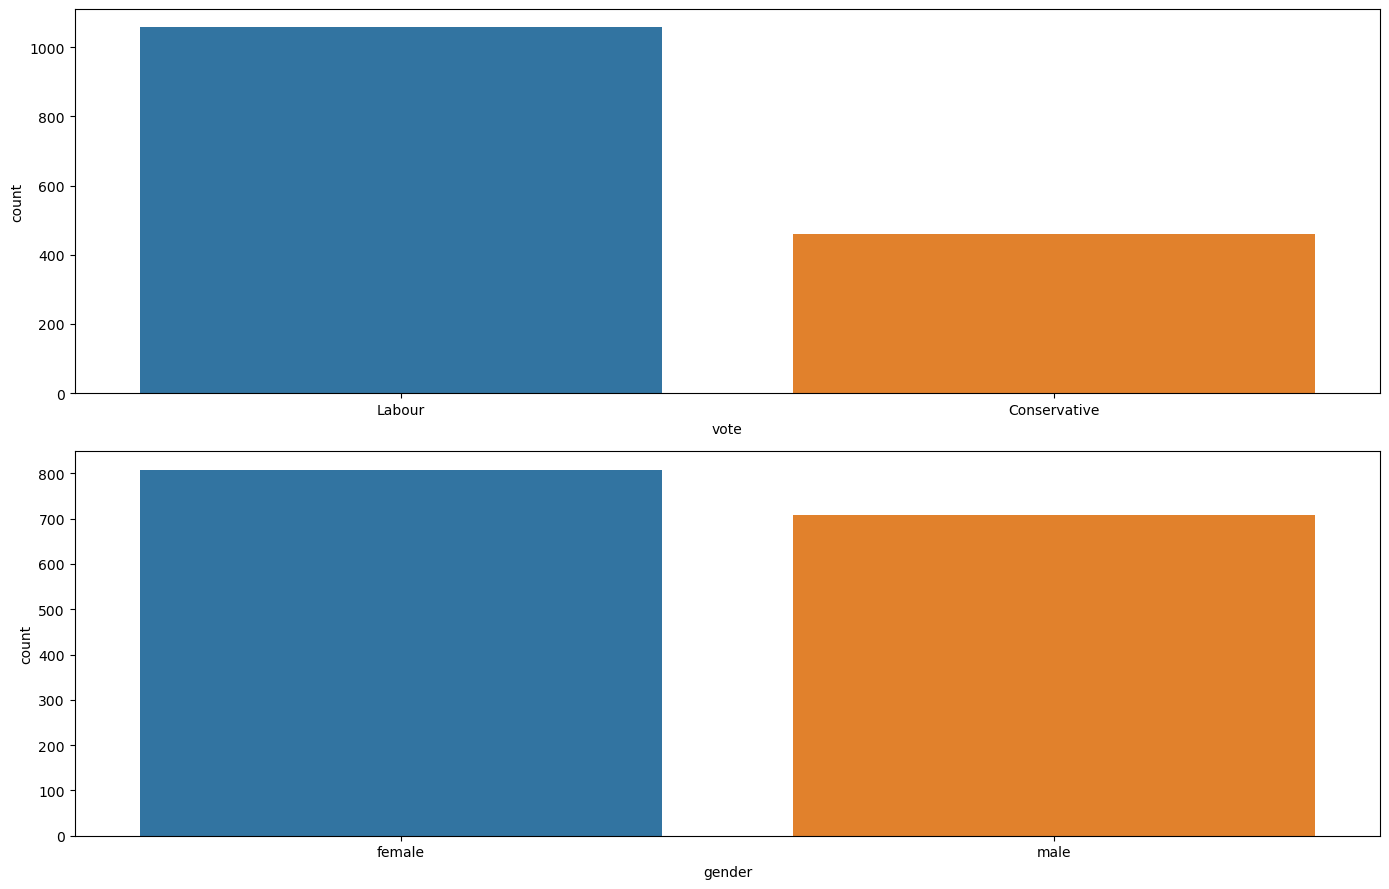

In [332]:
plt.figure(figsize = (14,9))
for i in range(0,len(obj_df)):
    plt.subplot(2,1,i+1)
    sns.countplot(df[obj_df[i]])
plt.tight_layout()

###### Bivariate Analysis

<AxesSubplot:>

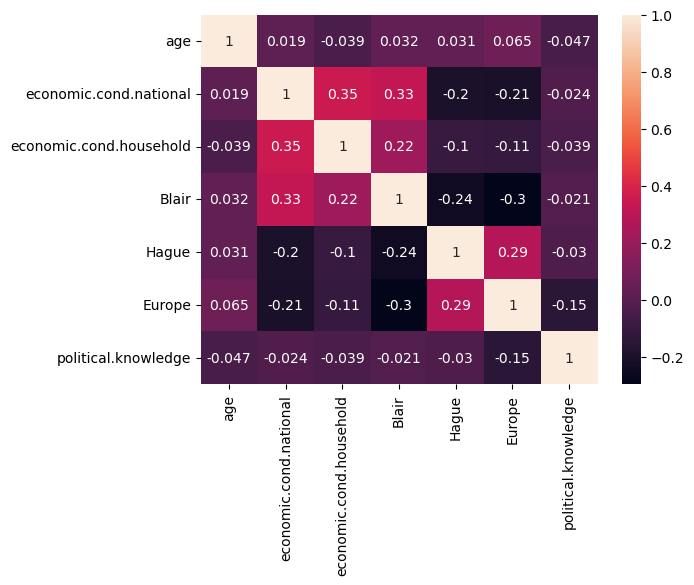

In [333]:
sns.heatmap(df.corr(),annot=True)

In [334]:
df.gender = df.gender.astype('category')

In [335]:
df.vote = df.vote.astype('category')

<AxesSubplot:xlabel='vote', ylabel='count'>

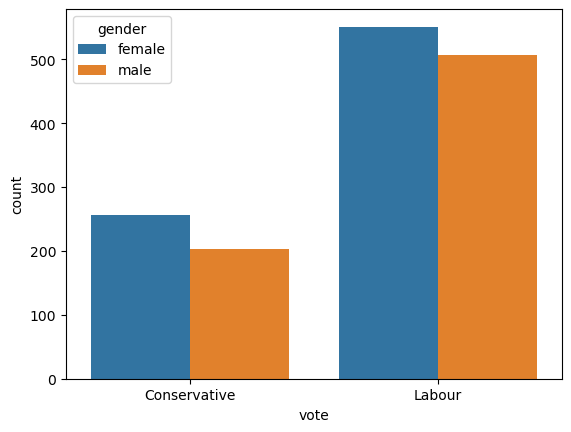

In [336]:
sns.countplot(data=df,hue='gender',x='vote')

<AxesSubplot:xlabel='age', ylabel='political.knowledge'>

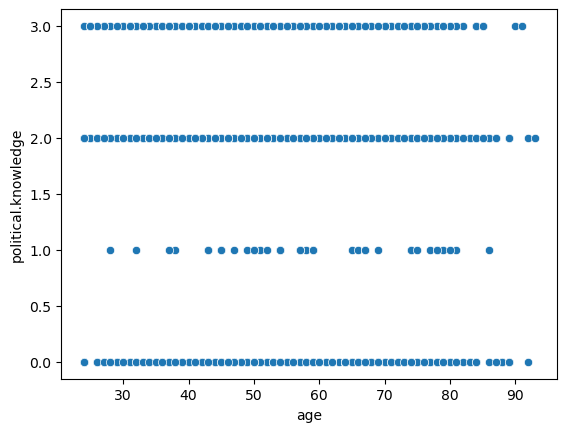

In [341]:
sns.scatterplot(data=df,x='age',y='political.knowledge')

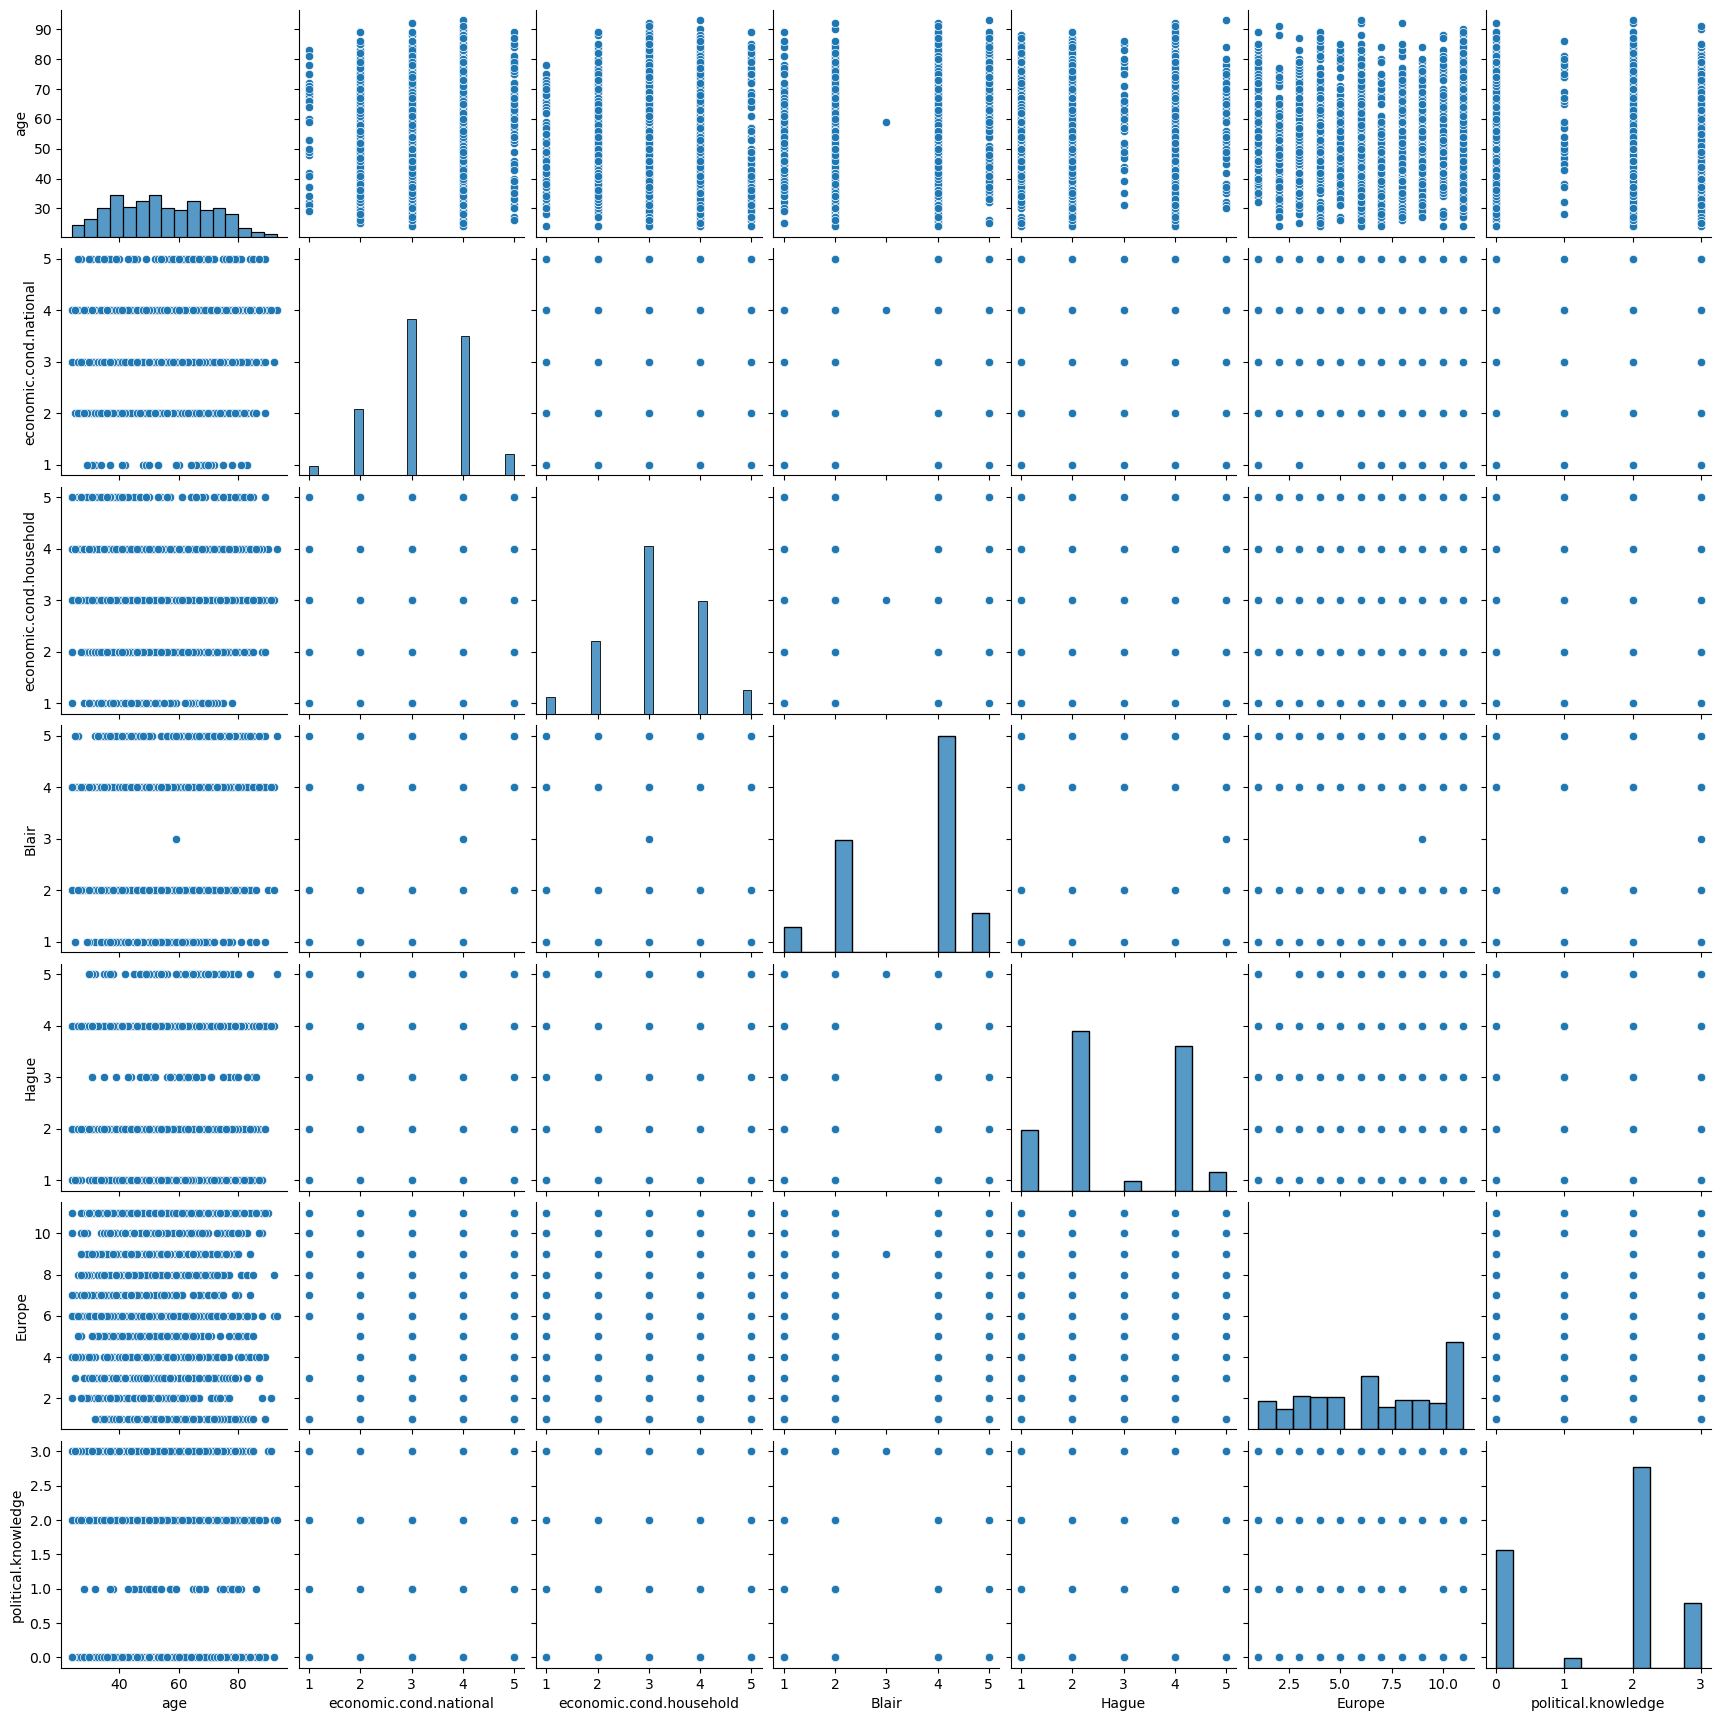

In [342]:
sns.pairplot(df)

###### Multivariate Analysis

<AxesSubplot:xlabel='Europe', ylabel='age'>

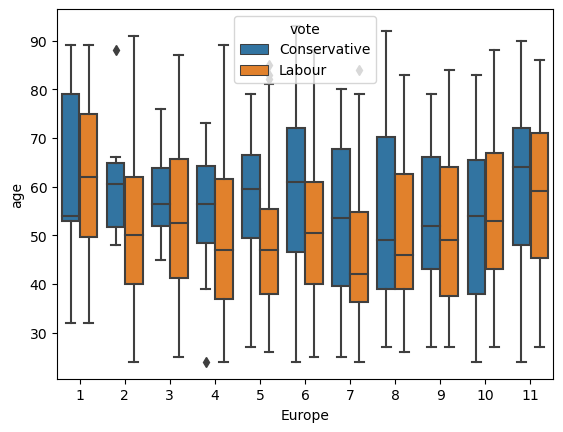

In [343]:
sns.boxplot(data=df,hue='vote',x='Europe',y='age')

In [344]:
df.vote.value_counts(normalize=True)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

<AxesSubplot:xlabel='Europe', ylabel='age'>

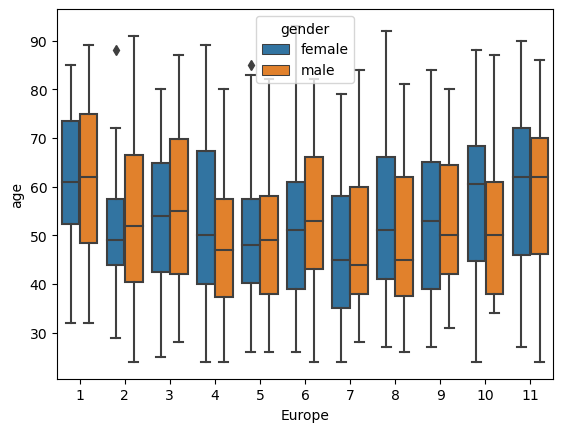

In [345]:
sns.boxplot(data=df,hue='gender',x='Europe',y='age')

 respondents attitudes toward European integration is High (Eurosceptic sentiment) for female respondants

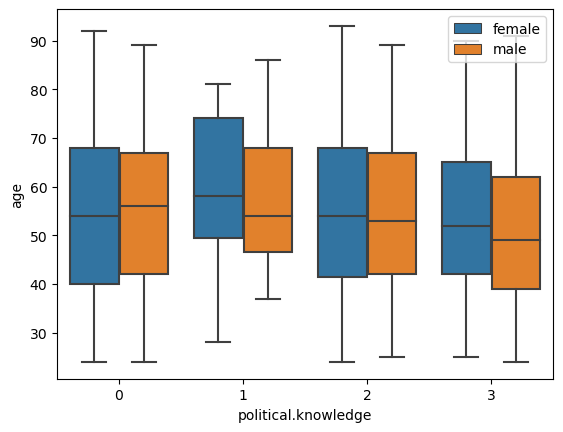

In [346]:
sns.boxplot(data=df,hue='gender',x='political.knowledge',y='age')
plt.legend(loc='upper right')

In [347]:
df.gender.value_counts(normalize=True)

female    0.53263
male      0.46737
Name: gender, dtype: float64

political knowledge is highest in respondant in late 40s and lowest in repondants in their mid 50s. male and female respondants show similar political knowledge in the age group of early 50s, while in general women seem to have more political knowledge across the board

### 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1517 non-null   category
 1   age                      1517 non-null   int64   
 2   economic.cond.national   1517 non-null   int64   
 3   economic.cond.household  1517 non-null   int64   
 4   Blair                    1517 non-null   int64   
 5   Hague                    1517 non-null   int64   
 6   Europe                   1517 non-null   int64   
 7   political.knowledge      1517 non-null   int64   
 8   gender                   1517 non-null   category
dtypes: category(2), int64(7)
memory usage: 130.3 KB


In [349]:
df = pd.get_dummies(df, columns=['vote','gender'],drop_first=True)

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1517 non-null   int64
 1   economic.cond.national   1517 non-null   int64
 2   economic.cond.household  1517 non-null   int64
 3   Blair                    1517 non-null   int64
 4   Hague                    1517 non-null   int64
 5   Europe                   1517 non-null   int64
 6   political.knowledge      1517 non-null   int64
 7   vote_Labour              1517 non-null   uint8
 8   gender_male              1517 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 130.1 KB


In [351]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
vote_Labour,1517.0,0.696770,0.459805,0.0,0.0,1.0,1.0,1.0
gender_male,1517.0,0.467370,0.499099,0.0,0.0,0.0,1.0,1.0


In [352]:
from scipy.stats import zscore


In [353]:
df_scaled = df[['age']].apply(zscore)

In [354]:
df_scaled['vote_Labour']= df['vote_Labour']
df_scaled['gender_male']= df['gender_male']
df_scaled['economic.cond.national'] =df['economic.cond.national']
df_scaled['economic.cond.household']=df['economic.cond.household']
df_scaled['Blair']=df['Blair']
df_scaled['Hague']=df['Hague']
df_scaled['Europe']=df['Europe']
df_scaled['political.knowledge']=df['political.knowledge']

In [355]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,1.917458e-17,1.000330,-1.926617,-0.843577,-0.079079,0.812836,2.46925
vote_Labour,1517.0,6.967699e-01,0.459805,0.000000,0.000000,1.000000,1.000000,1.00000
gender_male,1517.0,4.673698e-01,0.499099,0.000000,0.000000,0.000000,1.000000,1.00000
economic.cond.national,1517.0,3.245221e+00,0.881792,1.000000,3.000000,3.000000,4.000000,5.00000
economic.cond.household,1517.0,3.137772e+00,0.931069,1.000000,3.000000,3.000000,4.000000,5.00000
Blair,1517.0,3.335531e+00,1.174772,1.000000,2.000000,4.000000,4.000000,5.00000
Hague,1517.0,2.749506e+00,1.232479,1.000000,2.000000,2.000000,4.000000,5.00000
Europe,1517.0,6.740277e+00,3.299043,1.000000,4.000000,6.000000,10.000000,11.00000
political.knowledge,1517.0,1.540541e+00,1.084417,0.000000,0.000000,2.000000,2.000000,3.00000


In [356]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
vote_Labour,1517.0,0.696770,0.459805,0.0,0.0,1.0,1.0,1.0
gender_male,1517.0,0.467370,0.499099,0.0,0.0,0.0,1.0,1.0


As we are going to use K Nearest Neighbours , which is distance sensitive it is ideal to scale the data , so that the weights of a given attribute is balanced.

but for LDA , Logistic Regression and Naive Bayes Classifier , Scaling is not needed as its not a distance based algorithm 

In [357]:
# For LDA, Logistic Regression and Naive Bayes 
X = df.drop('vote_Labour',axis=1)
y = df.vote_Labour

# For KNN 
X_scaled = df_scaled.drop('vote_Labour',axis=1)
y_scaled = df_scaled.vote_Labour


In [358]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.30,random_state=1,stratify=y)


### 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

###### logistic Regression 

In [359]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
LR_Model = LogisticRegression()
LR_Model.fit(X_train,y_train)
y_predict = LR_Model.predict(X_test)
print(metrics.classification_report(y_test, y_predict))
# Test Data Accuracy 
model_score = LR_Model.score(X_test, y_test)
print('Test Data Accuracy ',model_score)
# Train Data Accuracy 
model_score = LR_Model.score(X_train, y_train)
print('Train Data Accuracy ',model_score)

              precision    recall  f1-score   support

           0       0.81      0.67      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.80      0.82       456
weighted avg       0.85      0.85      0.85       456

Test Data Accuracy  0.8530701754385965
Train Data Accuracy  0.8284637134778511


###### LDA

In [361]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
y_predict = lda.predict(X_test)
print(metrics.classification_report(y_test, y_predict))
# Test Data Accuracy 
model_score = lda.score(X_test, y_test)
print('Test Data Accuracy ',model_score)
# Train Data Accuracy 
model_score = lda.score(X_train, y_train)
print('Train Data Accuracy ',model_score)

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456

Test Data Accuracy  0.8530701754385965
Train Data Accuracy  0.822808671065033


The difference between Test Data Accuracy and Train Data accuracy are under 3% which implies no significant Under Fitting or Over Fitting

### 1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

###### KNN

In [363]:
X_Train,X_Test,Y_Train,Y_Test =  train_test_split(X_scaled,y_scaled,test_size=0.30,random_state=1,stratify=y)

In [364]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=31)
KNN.fit(X_Train,Y_Train)
# Train Data Accuracy
model_score=KNN.score(X_Train,Y_Train)
y_predict = KNN.predict(X_Test)
print('Train Data Accuracy',model_score)
# Test Data Accuracy
model_score=KNN.score(X_Test,Y_Test)
print('Test Data Accuracy',model_score)
print(metrics.classification_report(Y_Test,y_predict))

Train Data Accuracy 0.8294062205466541
Test Data Accuracy 0.8552631578947368
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.83      0.82      0.82       456
weighted avg       0.85      0.86      0.85       456



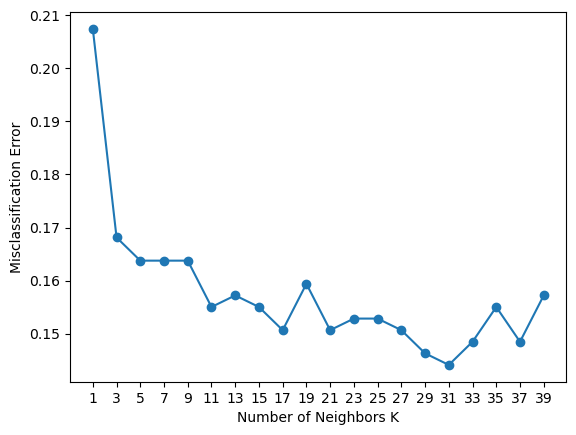

In [362]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,40,2):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_Train, Y_Train)
    # evaluate test accuracy
    scores = KNN.score(X_Test, Y_Test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE
plt.plot(range(1,40,2), MCE,marker = "o")
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.xticks(np.arange(1,40,2))
plt.show()

As the difference between train and test accuracies is less than 10%, it is a valid model, Number of Neighbours is set to 31 as it results in the least missclassification error and weights is chosen as uniform which is default as when distance is used as weight metric, there is an issue with overfitting and KNN being a distance based algorithmn, scaled dataset is used  

###### Naïve Bayes Model 

In [365]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,y_train)
y_predict = NB.predict(X_test)
# Train Data Accuracy
model_score = NB.score(X_train,y_train)
print('Train Data Accuracy',model_score)
# Test Data Accuracy
model_score = NB.score(X_test,y_test)
print('Test Data Accuracy',model_score)
print(metrics.classification_report(y_test,y_predict))

Train Data Accuracy 0.8199811498586239
Test Data Accuracy 0.8574561403508771
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



As the difference between train and test accuracies is less than 10%, it is a valid model, no issues of over fitting or under fitting

### 1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

In [366]:
from sklearn.model_selection import GridSearchCV

### Model Tuning 

##### LDA

In [367]:
param_grid = {'solver': ['svd', 'lsqr', 'eigen'],
              'shrinkage': [None] + [x / 10 for x in range(0, 11)] + ['auto'],
              'store_covariance': [True, False],
             
             }
lda = LinearDiscriminantAnalysis()
grid_search = GridSearchCV(estimator=lda, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 78 candidates, totalling 390 fits


GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': [None, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                       0.7, 0.8, 0.9, 1.0, 'auto'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'store_covariance': [True, False]},
             verbose=True)

In [368]:
grid_search.best_params_

{'shrinkage': None, 'solver': 'svd', 'store_covariance': True}

In [371]:
model1 = LinearDiscriminantAnalysis(solver= 'svd', store_covariance= True)
model1.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [372]:
model1.score(X_test,y_test)

0.8530701754385965

#### Logistic Regression 

In [373]:
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty': ['none', 'l1', 'l2', 'elasticnet'],
              'C': [100, 10, 1.0, 0.1, 0.01],
             
             }
lg = LogisticRegression()
grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [374]:
grid_search.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [375]:
model2 = LogisticRegression(solver='liblinear', penalty= 'l1', C=100)
model2.fit(X_train, y_train)

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [376]:
model2.score(X_test,y_test)

0.8552631578947368

#### KNN

In [377]:
param_grid = {'n_neighbors': np.arange(0,100),
              'metric': ['euclidean', 'manhattan', 'minkowski'],
              'weights': ['uniform', 'distance'],
             
             }
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_Train, Y_Train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [378]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'uniform'}

In [379]:
model3 = KNeighborsClassifier(n_neighbors=14, metric= 'manhattan', weights= 'uniform')
model3.fit(X_Train, Y_Train)

KNeighborsClassifier(metric='manhattan', n_neighbors=14)

In [380]:
model3.score(X_Test, Y_Test)

0.8618421052631579

In [381]:
model3.score(X_Train, Y_Train)

0.8407163053722903

#### Naive Bayes


Naive Bayes has close to No Hyper paramters that can be tuned

#### Random Forest Classifier with Hyper parameters

In [382]:
from sklearn.ensemble import RandomForestClassifier

In [383]:
param_grid = {'max_features':['sqrt','log2'],
              'n_estimators': np.arange(10,100,1000), }
RF = RandomForestClassifier()
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': array([10])},
             verbose=True)

In [384]:
grid_search.best_params_

{'max_features': 'log2', 'n_estimators': 10}

In [385]:
model4 = RandomForestClassifier(max_features='log2', n_estimators= 10)
model4.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=10)

In [386]:
model4.score(X_train, y_train)

0.9858623939679547

In [387]:
model4.score(X_test, y_test)

0.8267543859649122

###### Bagging

In [393]:
from sklearn.ensemble import BaggingClassifier 
est = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=est,n_estimators=50,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=50,
                  random_state=1)

In [394]:
y_predict = Bagging_model.predict(X_test)
# Train Data Accuracy
model_score = Bagging_model.score(X_train,y_train)
print('Train Data Accuracy',model_score)
# Test Data Accuracy
model_score = Bagging_model.score(X_test,y_test)
print('Test Data Accuracy',model_score)
print(metrics.classification_report(y_test,y_predict))

Train Data Accuracy 0.9651272384542884
Test Data Accuracy 0.8508771929824561
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.83      0.80      0.82       456
weighted avg       0.85      0.85      0.85       456



#### Bagging with hyper Parameters

In [391]:
param_grid = {'n_estimators': [10,50,100,1000],}
bgc = BaggingClassifier()
grid_search = GridSearchCV(estimator=bgc, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_Train, Y_Train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 1000]}, verbose=True)

In [392]:
grid_search.best_params_
# base model arleady optimized 

{'n_estimators': 50}

###### Boosting

In [397]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=50,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [398]:
y_predict = ADB_model.predict(X_test)
# Train Data Accuracy
model_score = ADB_model.score(X_train,y_train)
print('Train Data Accuracy',model_score)
# Test Data Accuracy
model_score = ADB_model.score(X_test,y_test)
print('Test Data Accuracy',model_score)
print(metrics.classification_report(y_test,y_predict))

Train Data Accuracy 0.8397737983034873
Test Data Accuracy 0.8355263157894737
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       138
           1       0.86      0.91      0.88       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



In [399]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=100,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [400]:
y_predict = gbcl.predict(X_test)
# Train Data Accuracy
model_score = gbcl.score(X_train,y_train)
print('Train Data Accuracy',model_score)
# Test Data Accuracy
model_score = gbcl.score(X_test,y_test)
print('Test Data Accuracy',model_score)
print(metrics.classification_report(y_test,y_predict))

Train Data Accuracy 0.885956644674835
Test Data Accuracy 0.8421052631578947
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

#### Performance Metrics for Naive Bayes

In [401]:
## Performance Matrix on train data set
print('Train Data\n')
y_train_predict = NB.predict(X_train)
y_train_probs = NB.predict_proba(X_train)[:,1]
NB_train_accuracy = NB.score(X_train, y_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
NB_train_df = pd.DataFrame(metrics.classification_report(y_train, y_train_predict,output_dict = True)).transpose()
NB_train_precision=round(NB_train_df.loc["1"][0],2)
NB_train_recall=round(NB_train_df.loc["1"][1],2)
NB_train_f1=round(NB_train_df.loc["1"][2],2)
NB_train_AUC = round(metrics.roc_auc_score(y_train,y_train_probs),2)
print(NB_train_AUC)

## Performance Matrix on test data set
print('\nTest Data\n')
y_test_predict = NB.predict(X_test)
y_test_probs = NB.predict_proba(X_test)[:,1]
NB_test_accuracy = NB.score(X_test, y_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
NB_test_df = pd.DataFrame(metrics.classification_report(y_test, y_test_predict,output_dict = True)).transpose()
NB_test_precision=round(NB_test_df.loc["1"][0],2)
NB_test_recall=round(NB_test_df.loc["1"][1],2)
NB_test_f1=round(NB_test_df.loc["1"][2],2)
NB_test_AUC = round(metrics.roc_auc_score(y_test,y_test_probs),2)
print(NB_test_AUC)

Train Data

[[226  96]
 [ 95 644]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061

0.87

Test Data

[[100  38]
 [ 27 291]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456

0.91


In [402]:
# Training Data Probability Prediction
pred_prob_train1 = NB.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test1 = NB.predict_proba(X_test)

AUC for the Training Data: 0.873
AUC for the Test Data: 0.912


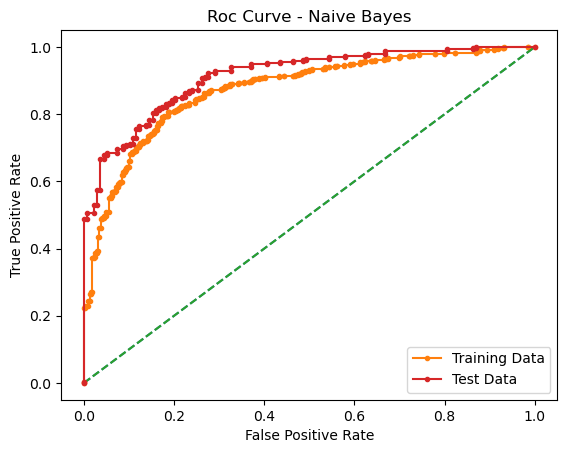

In [403]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train1[:,1])
print('AUC for the Training Data: %.3f' % auc)
plt.title('Roc Curve - Naive Bayes')
#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test1[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Performance metrics for KNN

In [406]:
## Performance Matrix on train data set
print('Train Data\n')
y_train_predict = model3.predict(X_Train)
y_train_probs = model3.predict_proba(X_Train)[:,1]
KNN_train_accuracy = model3.score(X_Train, Y_Train)
print(metrics.confusion_matrix(Y_Train, y_train_predict))
print(metrics.classification_report(Y_Train, y_train_predict))
KNN_train_df = pd.DataFrame(metrics.classification_report(Y_Train, y_train_predict,output_dict = True)).transpose()
KNN_train_precision=round(KNN_train_df.loc["1"][0],2)
KNN_train_recall=round(KNN_train_df.loc["1"][1],2)
KNN_train_f1=round(KNN_train_df.loc["1"][2],2)
KNN_train_AUC = round(metrics.roc_auc_score(Y_Train,y_train_probs),2)
print(KNN_train_AUC)

## Performance Matrix on test data set
print('\nTest Data\n')
y_test_predict = model3.predict(X_Test)
y_test_probs = model3.predict_proba(X_Test)[:,1]
KNN_test_accuracy = model3.score(X_Test, Y_Test)
print(metrics.confusion_matrix(Y_Test, y_test_predict))
print(metrics.classification_report(Y_Test, y_test_predict))
KNN_test_df = pd.DataFrame(metrics.classification_report(Y_Test, y_test_predict,output_dict = True)).transpose()
KNN_test_precision=round(KNN_test_df.loc["1"][0],2)
KNN_test_recall=round(KNN_test_df.loc["1"][1],2)
KNN_test_f1=round(KNN_test_df.loc["1"][2],2)
KNN_test_AUC = round(metrics.roc_auc_score(Y_Test,y_test_probs),2)
print(KNN_test_AUC)

Train Data

[[235  87]
 [ 82 657]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       322
           1       0.88      0.89      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061

0.91

Test Data

[[108  30]
 [ 33 285]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       138
           1       0.90      0.90      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.84      0.84       456
weighted avg       0.86      0.86      0.86       456

0.91


In [407]:
# Training Data Probability Prediction
pred_prob_train2 = model3.predict_proba(X_Train)

# Test Data Probability Prediction
pred_prob_test2 = model3.predict_proba(X_Test)

AUC for the Training Data: 0.905
AUC for the Test Data: 0.907


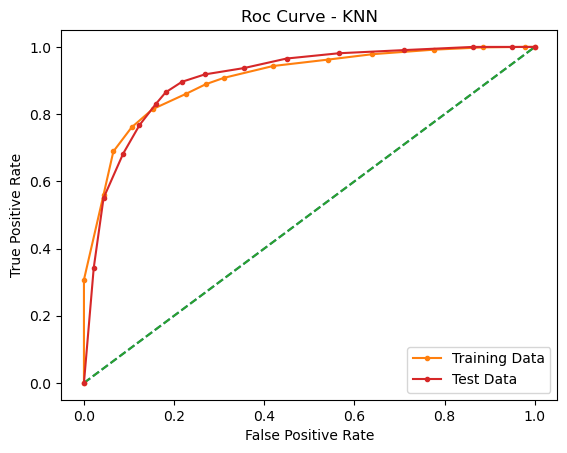

In [408]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_Train,pred_prob_train2[:,1])
print('AUC for the Training Data: %.3f' % auc)
plt.title('Roc Curve - KNN')
#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_Train,pred_prob_train2[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_Test,pred_prob_test2[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_Test,pred_prob_test2[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [409]:
## Performance Matrix on train data set
print('Train Data\n')
y_train_predict = model1.predict(X_train)
y_train_probs = model1.predict_proba(X_train)[:,1]
LDA_train_accuracy = model1.score(X_train, y_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
LDA_train_df = pd.DataFrame(metrics.classification_report(y_train, y_train_predict,output_dict = True)).transpose()
LDA_train_precision=round(LDA_train_df.loc["1"][0],2)
LDA_train_recall=round(LDA_train_df.loc["1"][1],2)
LDA_train_f1=round(LDA_train_df.loc["1"][2],2)
LDA_train_AUC = round(metrics.roc_auc_score(y_train,y_train_probs),2)
print(LDA_train_AUC)

## Performance Matrix on test data set
print('\nTest Data\n')
y_test_predict = model1.predict(X_test)
y_test_probs = model1.predict_proba(X_test)[:,1]
LDA_test_accuracy = model1.score(X_test, y_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
LDA_test_df = pd.DataFrame(metrics.classification_report(y_test, y_test_predict,output_dict = True)).transpose()
LDA_test_precision=round(LDA_test_df.loc["1"][0],2)
LDA_test_recall=round(LDA_test_df.loc["1"][1],2)
LDA_test_f1=round(LDA_test_df.loc["1"][2],2)
LDA_test_AUC = round(metrics.roc_auc_score(y_test,y_test_probs),2)
print(LDA_test_AUC)

Train Data

[[217 105]
 [ 83 656]]
              precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061

0.88

Test Data

[[ 95  43]
 [ 24 294]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456

0.91


In [410]:
# Training Data Probability Prediction
pred_prob_train3 = model1.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test3 = model1.predict_proba(X_test)

AUC for the Training Data: 0.877
AUC for the Test Data: 0.914


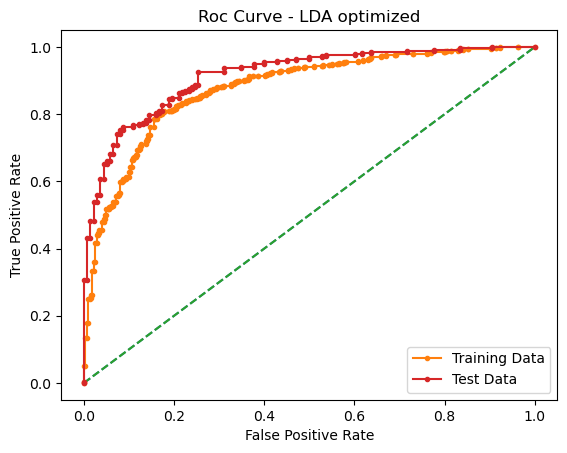

In [411]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train3[:,1])
print('AUC for the Training Data: %.3f' % auc)
plt.title('Roc Curve - LDA optimized')
#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train3[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test3[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test3[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [412]:
## Performance Matrix on train data set
print('Train Data\n')
y_train_predict = LR_Model.predict(X_train)
y_train_probs = LR_Model.predict_proba(X_train)[:,1]
Log_train_accuracy = LR_Model.score(X_train, y_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
Log_train_df = pd.DataFrame(metrics.classification_report(y_train, y_train_predict,output_dict = True)).transpose()
Log_train_precision=round(Log_train_df.loc["1"][0],2)
Log_train_recall=round(Log_train_df.loc["1"][1],2)
Log_train_f1=round(Log_train_df.loc["1"][2],2)
Log_train_AUC = round(metrics.roc_auc_score(y_train,y_train_probs),2)
print(Log_train_AUC)

## Performance Matrix on test data set
print('\nTest Data\n')
y_test_predict = LR_Model.predict(X_test)
y_test_probs = LR_Model.predict_proba(X_test)[:,1]
Log_test_accuracy = LR_Model.score(X_test, y_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
Log_test_df = pd.DataFrame(metrics.classification_report(y_test, y_test_predict,output_dict = True)).transpose()
Log_test_precision=round(Log_test_df.loc["1"][0],2)
Log_test_recall=round(Log_test_df.loc["1"][1],2)
Log_test_f1=round(Log_test_df.loc["1"][2],2)
Log_test_AUC = round(metrics.roc_auc_score(y_test,y_test_probs),2)
print(Log_test_AUC)

Train Data

[[213 109]
 [ 73 666]]
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.83      1061

0.88

Test Data

[[ 93  45]
 [ 22 296]]
              precision    recall  f1-score   support

           0       0.81      0.67      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.80      0.82       456
weighted avg       0.85      0.85      0.85       456

0.91


In [413]:
# Training Data Probability Prediction
pred_prob_train4 = LR_Model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test4 = LR_Model.predict_proba(X_test)

AUC for the Training Data: 0.877
AUC for the Test Data: 0.913


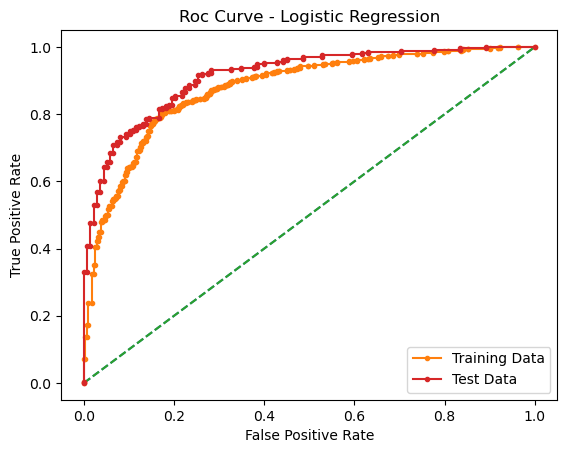

In [414]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train4[:,1])
print('AUC for the Training Data: %.3f' % auc)
plt.title('Roc Curve - Logistic Regression')
#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train4[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test4[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test4[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [415]:
#comparision of the various metrics
index=['Accuracy', 'Precision', 'Recall','F1 score','AUC']
data = pd.DataFrame({'Naive Bayes Train':[NB_train_accuracy,NB_train_precision,NB_train_recall,NB_train_f1,NB_train_AUC],
'Naive Bayes Test':[NB_test_accuracy,NB_test_precision,NB_test_recall,NB_test_f1,NB_test_AUC],
'Logistic Regression Train' :[Log_train_accuracy,Log_train_precision,Log_train_recall,Log_train_f1,Log_train_AUC],
'Logistic Regression Test' :[Log_test_accuracy,Log_test_precision,Log_test_recall,Log_test_f1,Log_test_AUC],
'KNN Train' :[KNN_train_accuracy,KNN_train_precision,KNN_train_recall,KNN_train_f1,KNN_train_AUC],
'KNN Test' :[KNN_test_accuracy,KNN_test_precision,KNN_test_recall,KNN_test_f1,KNN_test_AUC],
'LDA Train' :[LDA_train_accuracy,LDA_train_precision,LDA_train_recall,LDA_train_f1,LDA_train_AUC],
'LDA Test' :[LDA_test_accuracy,LDA_test_precision,LDA_test_recall,LDA_test_f1,LDA_test_AUC]
},index = index)
round(data,2)

,Naive Bayes Train,Naive Bayes Test,Logistic Regression Train,Logistic Regression Test,KNN Train,KNN Test,LDA Train,LDA Test
Accuracy,0.82,0.86,0.83,0.85,0.84,0.86,0.82,0.85
Precision,0.87,0.88,0.86,0.87,0.88,0.90,0.86,0.87
Recall,0.87,0.92,0.90,0.93,0.89,0.90,0.89,0.92
F1 score,0.87,0.90,0.88,0.90,0.89,0.90,0.87,0.90
AUC,0.87,0.91,0.88,0.91,0.91,0.91,0.88,0.91


In [417]:
data_train = data.transpose()
data_train = data_train[data_train.index.str.contains('Train')]
data_train.style.highlight_max(color = 'yellow', axis = 0)

,Accuracy,Precision,Recall,F1 score,AUC
Naive Bayes Train,0.819981,0.870000,0.870000,0.870000,0.870000
Logistic Regression Train,0.828464,0.860000,0.900000,0.880000,0.880000
KNN Train,0.840716,0.880000,0.890000,0.890000,0.910000
LDA Train,0.822809,0.860000,0.890000,0.870000,0.880000


In [418]:
data_test = data.transpose()
data_test = data_test[data_test.index.str.contains('Test')]
data_test.style.highlight_max(color = 'yellow', axis = 0)

,Accuracy,Precision,Recall,F1 score,AUC
Naive Bayes Test,0.857456,0.880000,0.920000,0.900000,0.910000
Logistic Regression Test,0.853070,0.870000,0.930000,0.900000,0.910000
KNN Test,0.861842,0.900000,0.900000,0.900000,0.910000
LDA Test,0.853070,0.870000,0.920000,0.900000,0.910000


### 1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

# Problem 2

In [280]:
import re 
import nltk 
import string 
import matplotlib

In [281]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\preet\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [282]:
len(inaugural.fileids())

59

In [283]:
nltk.FreqDist(inaugural.words(['1941-Roosevelt.txt','1961-Kennedy.txt','1973-Nixon.txt'])).most_common(10) 
# common words among the 3 speeches 

[('the', 267),
 (',', 258),
 ('of', 214),
 ('.', 186),
 ('to', 138),
 ('and', 128),
 ('in', 108),
 ('a', 92),
 ('we', 87),
 ('that', 74)]

In [284]:
import pandas as pd
reviews = []
for fileid in inaugural.fileids():
    filename = fileid
    reviews.append((filename,inaugural.raw(fileid)))

df = pd.DataFrame(reviews, columns=['filename','text'])

In [285]:
df = df.query("filename == '1941-Roosevelt.txt' | filename == '1961-Kennedy.txt'| filename == '1973-Nixon.txt'")

In [286]:
df.reset_index(inplace=True)

### 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

###### No of Words

In [287]:
len(inaugural.words('1941-Roosevelt.txt'))

1536

In [288]:
len(inaugural.words('1961-Kennedy.txt'))

1546

In [289]:
len(inaugural.words('1973-Nixon.txt'))

2028

###### No of sentences

In [290]:
len(inaugural.sents('1941-Roosevelt.txt'))

68

In [291]:
len(inaugural.sents('1961-Kennedy.txt'))

52

In [292]:
len(inaugural.sents('1973-Nixon.txt'))

69

###### No of Characters

In [293]:
len([char for sentence in inaugural.sents('1941-Roosevelt.txt') for word in sentence for char in word])

6174

In [294]:
len([char for sentence in inaugural.sents('1961-Kennedy.txt') for word in sentence for char in word])

6202

In [295]:
len([char for sentence in inaugural.sents('1973-Nixon.txt') for word in sentence for char in word])

8122

### 2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [296]:
df['WordCount_Before'] = [len(x.split()) for x in df['text'].tolist()]
df[['text','WordCount_Before']].head()

,text,WordCount_Before
0,On each national day of inauguration since 178...,1360
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1390
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1819


###### lower case conversion

In [297]:
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text'].head()

0    on each national day of inauguration since 178...
1    vice president johnson, mr. speaker, mr. chief...
2    mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

###### stopword removal 

In [298]:
stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation)+['...', '.', '----','--']

In [299]:
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
df['text'].head()

0    national day inauguration since 1789, people r...
1    vice president johnson, mr. speaker, mr. chief...
2    mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

###### Stemming

In [300]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    nation day inaugur sinc 1789, peopl renew sens...
1    vice presid johnson, mr. speaker, mr. chief ju...
2    mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

In [301]:
df['WordCount_After'] = [len(x.split()) for x in df['text'].tolist()]
df.drop('index',inplace=True, axis=1)
df.head()

,filename,text,WordCount_Before,WordCount_After
0,1941-Roosevelt.txt,"national day inauguration since 1789, people r...",1360,644
1,1961-Kennedy.txt,"vice president johnson, mr. speaker, mr. chief...",1390,705
2,1973-Nixon.txt,"mr. vice president, mr. speaker, mr. chief jus...",1819,844


In [302]:
df['text'].tolist()

['national day inauguration since 1789, people renewed sense dedication united states. washington\'s day task people create weld together nation. lincoln\'s day task people preserve nation disruption within. day task people save nation institutions disruption without. us come time, midst swift happenings, pause moment take stock recall place history been, rediscover may be. not, risk real peril inaction. lives nations determined count years, lifetime human spirit. life man three-score years ten: little more, little less. life nation fullness measure live. men doubt this. men believe democracy, form government frame life, limited measured kind mystical artificial fate that, unexplained reason, tyranny slavery become surging wave future freedom ebbing tide. americans know true. eight years ago, life republic seemed frozen fatalistic terror, proved true. midst shock acted. acted quickly, boldly, decisively. later years living years fruitful years people democracy. brought us greater secur

###### Sample Sentence

1941-Roosevelt.txt : 'national day inauguration since 1789, people renewed sense dedication united states. washington\'s day task people create weld together nation. lincoln\'s day task people preserve nation disruption within. day task people save nation institutions disruption without. us come time, midst swift happenings, pause moment take stock recall place history been, rediscover may be. not, risk real peril inaction. lives nations determined count years, lifetime human spirit. life man three-score years ten: little more, little less. life nation fullness measure live. men doubt this. men believe democracy, form government frame life, limited measured kind mystical artificial fate that, unexplained reason, tyranny slavery become surging wave future freedom ebbing tide. americans know true. eight years ago, life republic seemed frozen fatalistic terror, proved true. midst shock acted. acted quickly, boldly, decisively. later years living years fruitful years people democracy. brought us greater security and, hope, better understanding life\'s ideals measured material things. vital present future experience democracy successfully survived crisis home; put away many evil things; built new structures enduring lines; and, all, maintained fact democracy. action taken within three-way framework constitution united states. coordinate branches government continue freely function. bill rights remains inviolate. freedom elections wholly maintained. prophets downfall american democracy seen dire predictions come naught. democracy dying. know seen revive--and grow. know cannot die built unhampered initiative individual men women joined together common enterprise enterprise undertaken carried free expression free majority. know democracy alone, forms government, enlists full force men\'s enlightened will. know democracy alone constructed unlimited civilization capable infinite progress improvement human life. know because, look surface, sense still spreading every continent humane, advanced, end unconquerable forms human society. nation, like person, body--a body must fed clothed housed, invigorated rested, manner measures objectives time. nation, like person, mind mind must kept informed alert, must know itself, understands hopes needs neighbors nations live within narrowing circle world. nation, like person, something deeper, something permanent, something larger sum parts. something matters future calls forth sacred guarding present. thing find difficult even impossible hit upon single, simple word. yet understand spirit faith america. product centuries. born multitudes came many lands high degree, mostly plain people, sought here, early late, find freedom freely. democratic aspiration mere recent phase human history. human history. permeated ancient life early peoples. blazed anew middle ages. written magna charta. americas impact irresistible. america new world tongues, peoples, continent new-found land, came believed could create upon continent new life life new freedom. vitality written mayflower compact, declaration independence, constitution united states, gettysburg address. first came carry longings spirit, millions followed, stock sprang moved forward constantly consistently toward ideal gained stature clarity generation. hopes republic cannot forever tolerate either undeserved poverty self-serving wealth. know still far go; must greatly build security opportunity knowledge every citizen, measure justified resources capacity land. enough achieve purposes alone. enough clothe feed body nation, instruct inform mind. also spirit. three, greatest spirit. without body mind, men know, nation could live. spirit america killed, even though nation\'s body mind, constricted alien world, lived on, america know would perished. spirit faith speaks us daily lives ways often unnoticed, seem obvious. speaks us capital nation. speaks us processes governing sovereignties 48 states. speaks us counties, cities, towns, villages. speaks us nations hemisphere, across seas enslaved, well free. sometimes fail hear heed voices freedom us privilege freedom old, old story. destiny america proclaimed words prophecy spoken first president first inaugural 1789 words almost directed, would seem, year 1941: "the preservation sacred fire liberty destiny republican model government justly considered deeply, finally, staked experiment intrusted hands american people." lose sacred fire--if let smothered doubt fear shall reject destiny washington strove valiantly triumphantly establish. preservation spirit faith nation does, will, furnish highest justification every sacrifice may make cause national defense. face great perils never encountered, strong purpose protect perpetuate integrity democracy. muster spirit america, faith america. retreat. content stand still. americans, go forward, service country, god.',

### 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

###### top 3 words for '1941-Roosevelt.txt'

In [303]:
pd.Series(''.join(df['text'].loc[(df.filename == '1941-Roosevelt.txt')]).split()).value_counts()[:3]

know    9
us      8
life    6
dtype: int64

###### top 3 words for '1961-Kennedy.txt'

In [304]:
pd.Series(''.join(df['text'].loc[(df.filename == '1961-Kennedy.txt')]).split()).value_counts()[:3]

let    16
us     11
new     7
dtype: int64

###### top 3 words for '1973-Nixon.txt'

In [305]:
pd.Series(''.join(df['text'].loc[(df.filename == '1973-Nixon.txt')]).split()).value_counts()[:3]

us     25
let    22
new    15
dtype: int64

### 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [306]:
wc_a = ' '.join(df['text'].loc[(df.filename == '1973-Nixon.txt')])

Word Cloud for 1973-Nixon.txt


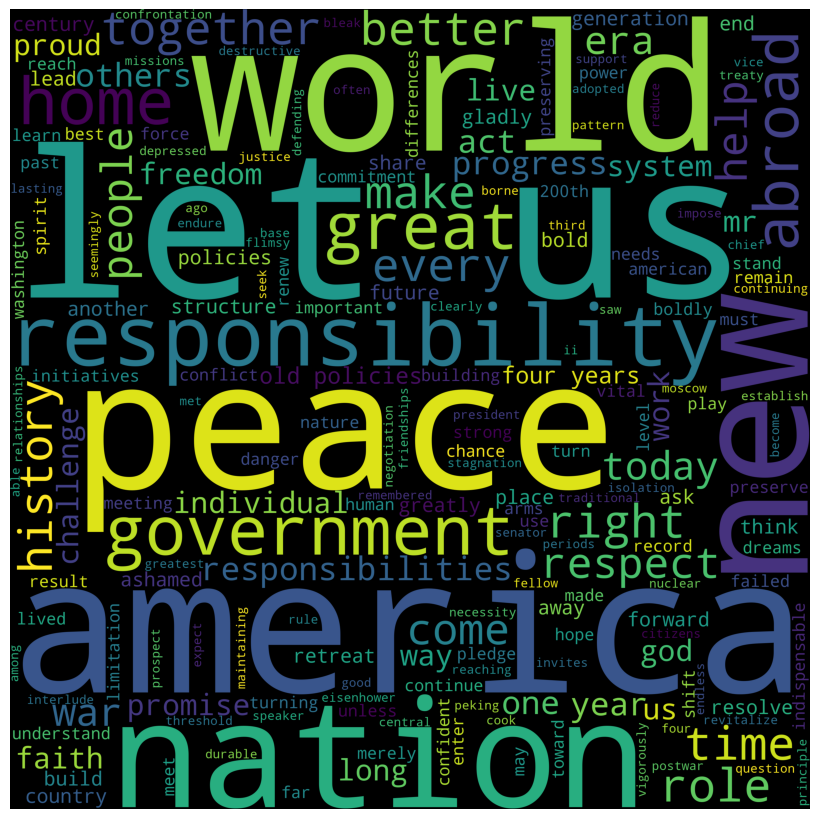

In [307]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1973-Nixon.txt")
plt.show()

In [308]:
wc_b = ' '.join(df['text'].loc[(df.filename == '1961-Kennedy.txt')])

Word Cloud for 1961-Kennedy.txt


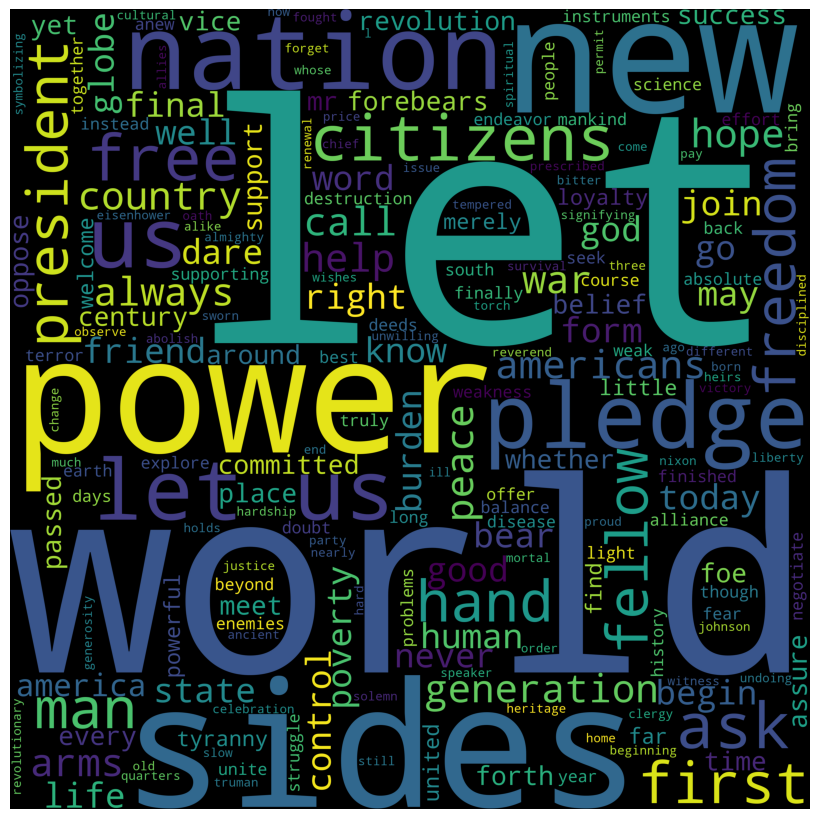

In [309]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_b) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1961-Kennedy.txt")
plt.show()

In [310]:
wc_c = ' '.join(df['text'].loc[(df.filename == '1941-Roosevelt.txt')])

Word Cloud for 1941-Roosevelt.txt


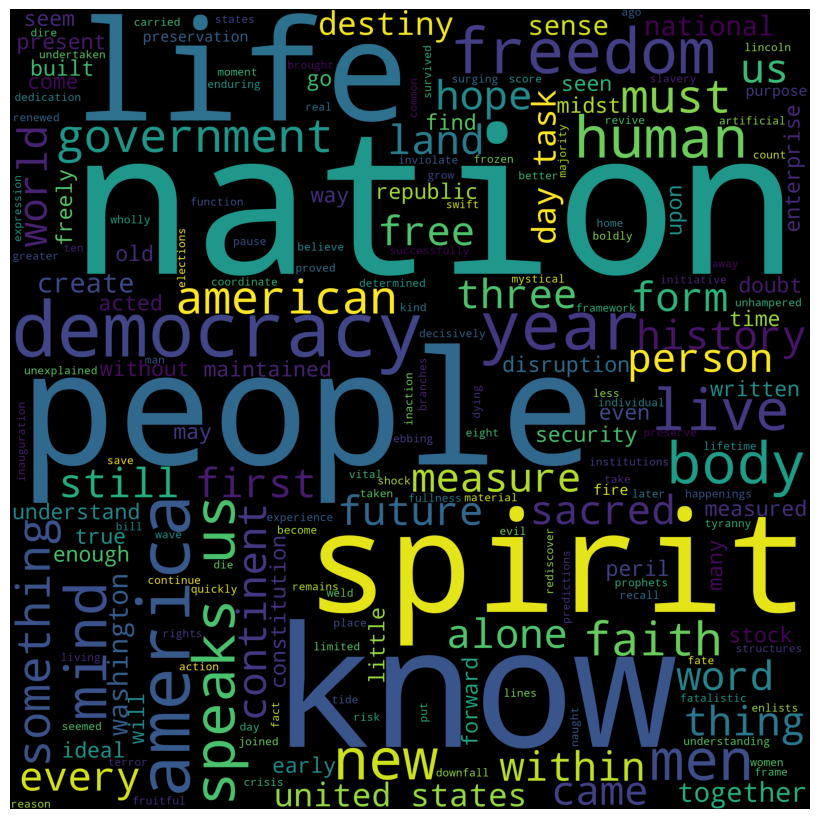

In [311]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_c) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1941-Roosevelt.txt")
plt.show()